In [21]:
#import libraries for data handling, visualization, and modeling
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


In [22]:
#loading the world happiness report dataset
CSV_PATH = "World-happiness-report-updated_2024.csv"

#display the first couple rows and info in dataset
df = pd.read_csv(CSV_PATH, encoding='latin1') 

display(df.head())
print(df.info())

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.164   
1                              50.8                         0.679       0.187   
2                              51.1                         0.600       0.118   
3                              51.4                         0.496       0.160   
4                              51.7                         0.531       0.234   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None


In [23]:
#define the target variable and the featured columns
TARGET = "Life Ladder"  
FEATURES = [
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy at birth",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
]

#check if all of the required columns exist in the dataset
required = FEATURES + [TARGET]
missing = [c for c in required if c not in df.columns]
print("Missing:", missing)

Missing: []


In [24]:
# drop the rows with missing values in the target column
TARGET = 'Life Ladder'  

# Check if the column exists in the DataFrame
if TARGET in df.columns:
    # Drop missing values in the target
    df = df.dropna(subset=[TARGET]).copy()

Available columns: ['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


Log GDP per capita  Social support  Healthy life expectancy at birth  \
count         2335.000000     2350.000000                       2300.000000   
mean             9.399671        0.809369                         63.401828   
std              1.152069        0.121212                          6.842644   
min              5.527000        0.228000                          6.720000   
25%              8.506500        0.744000                         59.195000   
50%              9.503000        0.834500                         65.100000   
75%             10.392500        0.904000                         68.552500   
max             11.676000        0.987000                         74.600000   

       Freedom to make life choices   Generosity  Perceptions of corruption  \
count                   2327.000000  2282.000000                2238.000000   
mean                       0.750282     0.000098                   0.743971   
std                        0.139357     0.161388                   0.184865   
min                        0.228000    -0.340000                   0.035000   
25%                        0.661000    -0.112000                   0.687000   
50%                        0.771000    -0.022000                   0.798500   
75%                        0.862000     0.093750                   0.867750   
max                        0.985000     0.700000                   0.983000   

       Life Ladder  
count  2363.000000  
mean      5.483566  
std       1.125522  
min       1.281000  
25%       4.647000  
50%       5.449000  
75%       6.323500  
max       8.019000

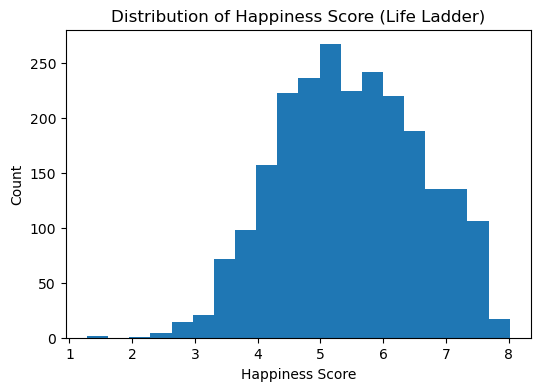

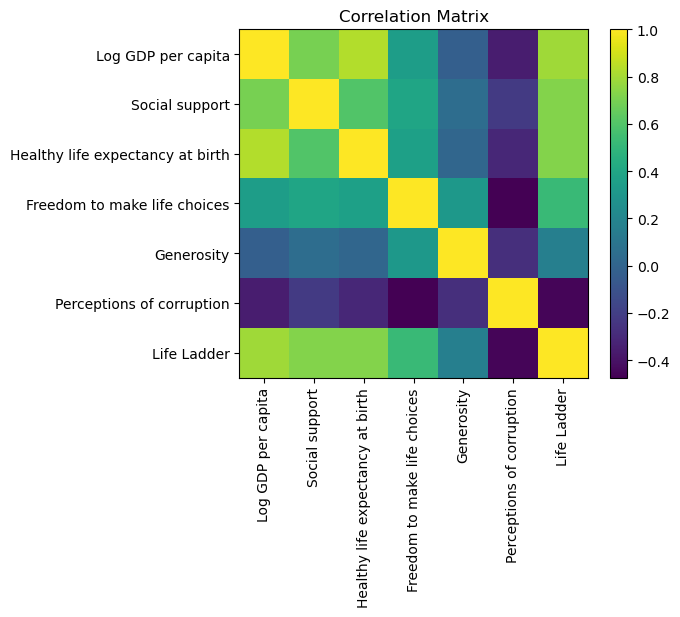

In [25]:
#print available columns in the dataset to check the names
print("Available columns:", df.columns.tolist())

#check if all of the features and the target columns are in the dataset
for col in FEATURES + [TARGET]:
    if col not in df.columns:
        print(f"Warning: '{col}' is not in the DataFrame columns")

#only go forward if all of the required columns are there
if all(col in df.columns for col in FEATURES + [TARGET]):
  #show the summary statistics for the columns
    display(df[FEATURES + [TARGET]].describe(include="all"))
    
  #create a histogram to show the distribution of happiness score
    plt.figure(figsize=(6,4))
    plt.hist(df[TARGET].dropna(), bins=20)
    plt.title("Distribution of Happiness Score (Life Ladder)")
    plt.xlabel("Happiness Score")
    plt.ylabel("Count")
    plt.show()
    
  #correlation matrix to see how features connect to each other
    num_df = df[FEATURES + [TARGET]].select_dtypes(include=[np.number]).dropna()
    corr = num_df.corr().values
    labels = num_df.columns.tolist()

    #plot the correlation matrix as a heatmap
    plt.figure(figsize=(7,6))
    plt.imshow(corr, interpolation="nearest")
    plt.colorbar()
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.yticks(range(len(labels)), labels)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

In [26]:
#split the data into training and testing the sets
def train_test_xy(df, features, target, test_size=0.2, random_state=42):
    X = df[features].copy()
    y = df[target].copy()
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [27]:
#function to evaluate model performance
def evaluate(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> RMSE: {rmse:.4f} | R²: {r2:.4f}")
    return rmse, r2


In [28]:
#split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_xy(df, FEATURES, TARGET)
#fill any missing values in the training and testing sets using the mean of the columns
X_train = X_train.fillna(X_train.mean(numeric_only=True))
X_test  = X_test.fillna(X_train.mean(numeric_only=True))


In [29]:
#make and train a Linear Regression Model
linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)
#predict the happiness score using the data
y_pred_1 = linreg_1.predict(X_test)
#evaluate how well the model performed 
rmse_1, r2_1 = evaluate(y_test, y_pred_1, "Exp 1: Linear (raw)")


Exp 1: Linear (raw) -> RMSE: 0.5902 | R²: 0.7228


feature  coefficient
1                    Social support     2.785543
3      Freedom to make life choices     1.239632
4                        Generosity     0.537253
0                Log GDP per capita     0.355253
2  Healthy life expectancy at birth     0.025807
5         Perceptions of corruption    -0.577939

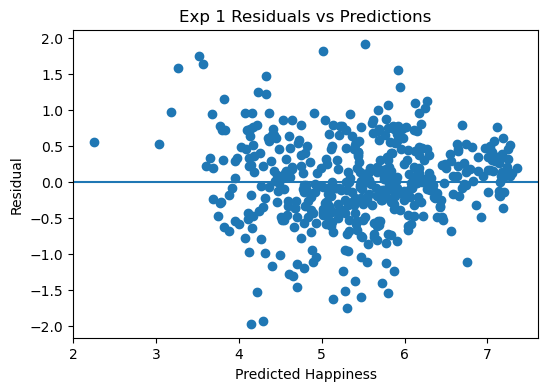

In [30]:
# Coefficients table
coef_table_1 = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": linreg_1.coef_
}).sort_values("coefficient", ascending=False)
display(coef_table_1)

# Residual plot
resid_1 = y_test - y_pred_1
plt.figure(figsize=(6,4))
plt.scatter(y_pred_1, resid_1)
plt.axhline(0)
plt.title("Exp 1 Residuals vs Predictions")
plt.xlabel("Predicted Happiness")
plt.ylabel("Residual")
plt.show()


In [31]:
#define new set of data, removed Generosity
FEATURES_EXP2 = [
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy at birth",  
    "Freedom to make life choices",

    "Perceptions of corruption",
]
#split the data into training and testing sets using the new feature
X_train2, X_test2, y_train2, y_test2 = train_test_xy(df, FEATURES_EXP2, TARGET)
#fill missing values in both the training and test sets with each column
X_train2 = X_train2.fillna(X_train2.mean(numeric_only=True))
X_test2  = X_test2.fillna(X_train2.mean(numeric_only=True))
#scale the features so that the features on the same range
scaler = StandardScaler()
X_train2_s = scaler.fit_transform(X_train2)
X_test2_s  = scaler.transform(X_test2)


Exp 2: Linear (scaled + selected) -> RMSE: 0.5949 | R²: 0.7184


feature  coef_stdspace
0                Log GDP per capita       0.396989
1                    Social support       0.341839
3      Freedom to make life choices       0.195696
2  Healthy life expectancy at birth       0.173082
4         Perceptions of corruption      -0.118280

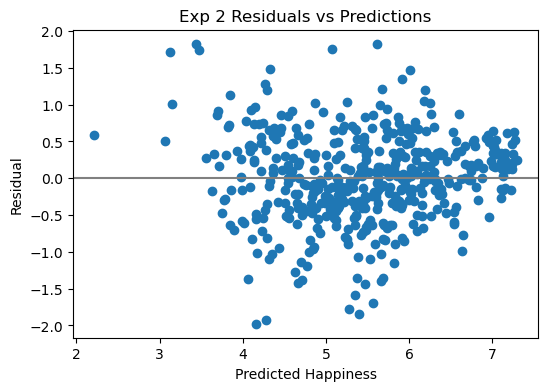

In [32]:
#make and train a new Linear Regression Model using the scaled data
linreg_2 = LinearRegression()
linreg_2.fit(X_train2_s, y_train2)
#predict the happiness scores using the data
y_pred_2 = linreg_2.predict(X_test2_s)
#evaluate the model performance
rmse_2, r2_2 = evaluate(y_test2, y_pred_2, "Exp 2: Linear (scaled + selected)")
#show the model coefficients for each features
coef_table_2 = pd.DataFrame({
    "feature": FEATURES_EXP2,
    "coef_stdspace": linreg_2.coef_.flatten()
}).sort_values("coef_stdspace", ascending=False)

display(coef_table_2)
#plot residuals
resid_2 = y_test2 - y_pred_2
plt.figure(figsize=(6,4))
plt.scatter(y_pred_2, resid_2)
plt.axhline(0, color="gray")
plt.title("Exp 2 Residuals vs Predictions")
plt.xlabel("Predicted Happiness")
plt.ylabel("Residual")
plt.show()


In [33]:
#Ridge Regression
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train2_s, y_train2)
#make predictions using the Ridge Model
y_pred_3 = ridge.predict(X_test2_s)
#evaluate the model performance
rmse_3, r2_3 = evaluate(y_test2, y_pred_3, "Exp 3: Ridge (scaled + selected)")


Exp 3: Ridge (scaled + selected) -> RMSE: 0.5949 | R²: 0.7184


feature  coef_ridge
0                Log GDP per capita    0.396648
1                    Social support    0.341758
3      Freedom to make life choices    0.195647
2  Healthy life expectancy at birth    0.173326
4         Perceptions of corruption   -0.118303

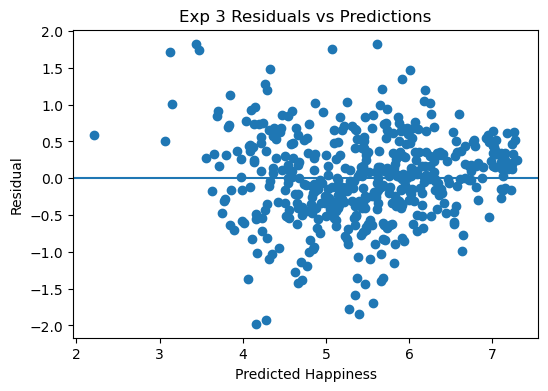

In [34]:
#make a table showing Ridge coefficients for each of the features
coef_table_3 = pd.DataFrame({
    "feature": FEATURES_EXP2,
    "coef_ridge": ridge.coef_
}).sort_values("coef_ridge", ascending=False)
display(coef_table_3)
#plot the residuals for the Ridge Model
resid_3 = y_test2 - y_pred_3
plt.figure(figsize=(6,4))
plt.scatter(y_pred_3, resid_3)
plt.axhline(0)
plt.title("Exp 3 Residuals vs Predictions")
plt.xlabel("Predicted Happiness")
plt.ylabel("Residual")
plt.show()


In [35]:
#put together the results from all of the experiments so it's easily comparable
summary = pd.DataFrame({
    "Experiment": [
        "Exp 1: Linear (raw)",
        "Exp 2: Linear (scaled + selected)",
        "Exp 3: Ridge (scaled + selected)"
    ],
    "RMSE": [rmse_1, rmse_2, rmse_3],
    "R2":   [r2_1,   r2_2,   r2_3]
})
display(summary)


Experiment      RMSE        R2
0                Exp 1: Linear (raw)  0.590244  0.722753
1  Exp 2: Linear (scaled + selected)  0.594867  0.718393
2   Exp 3: Ridge (scaled + selected)  0.594868  0.718392